In [18]:
import pandas as pd 
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [19]:
df_1=pd.read_pickle(r"C:\Users\USER\Desktop\랩실 자료\[프로젝트] 킬링 타임 방지를 위한 유튜브 알고리즘 시각화 및 조정\코드 파일\찐막\[은호]찐막Youtube_shorts.pkl")
df_2=pd.read_pickle(r"C:\Users\USER\Desktop\랩실 자료\[프로젝트] 킬링 타임 방지를 위한 유튜브 알고리즘 시각화 및 조정\코드 파일\찐막\[정흠]찐막Youtube_shorts.pkl")
df_3=pd.read_pickle(r"C:\Users\USER\Desktop\랩실 자료\[프로젝트] 킬링 타임 방지를 위한 유튜브 알고리즘 시각화 및 조정\코드 파일\찐막\[지애]찐막Youtube_shorts.pkl")

# 1. 영상 분포 시각화

### 3명 데이터셋 합쳐서 진행

In [25]:
total_df = pd.concat([df_1, df_2, df_3], ignore_index=True)

In [26]:
len(total_df)

61615

In [98]:
print(total_df['watched_duration'].min())
print(total_df['watched_duration'].max())
print(total_df['sec'].min())
print(total_df['sec'].max())

0.0
124.0
2
60


### `쇼츠 영상 길이 및 실제 시청 시간 분포`

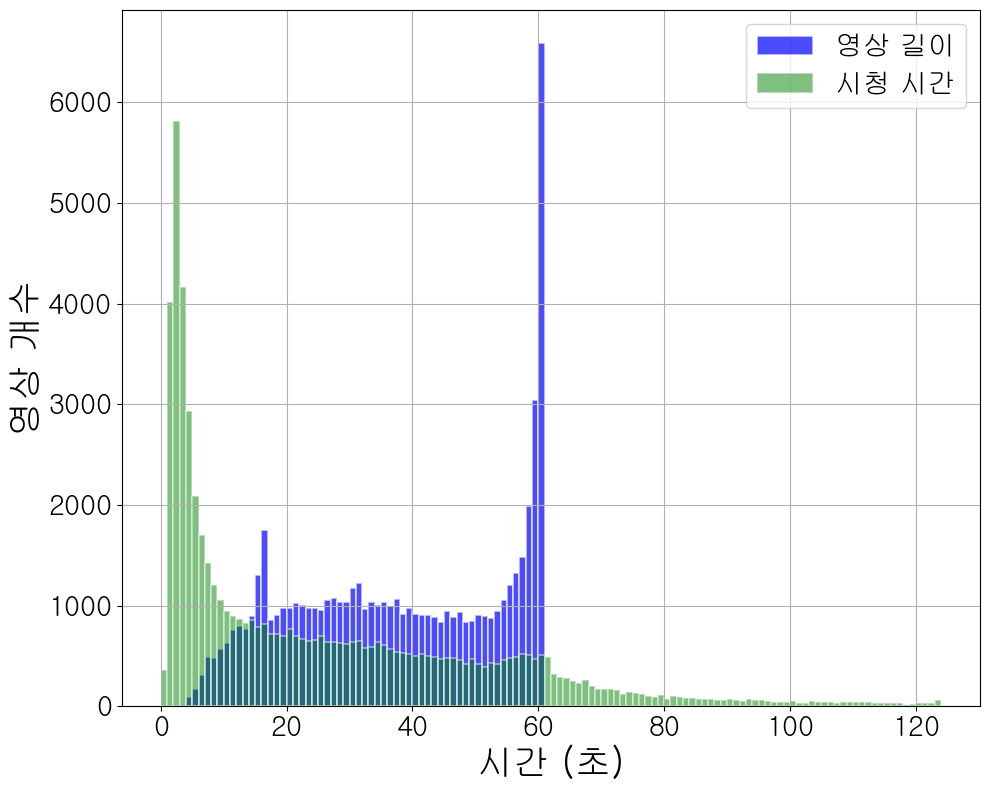

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(10, 8))

# 영상시간 히스토그램
ax.hist(total_df['sec'], bins=np.arange(0, 125, 1), alpha=0.7, color='blue', label='영상 길이', edgecolor='white', linewidth=1.2)

# 시청시간 히스토그램
ax.hist(total_df['watched_duration'], bins=np.arange(0, 125, 1), alpha=0.5, color='green', label='시청 시간', edgecolor='white', linewidth=1.2)

# 제목, x,y축 등
ax.set_xlabel('시간 (초)', fontproperties=font, fontsize=26)
ax.set_ylabel('영상 개수', fontproperties=font, fontsize=26)
ax.legend(prop=font)
ax.legend(fontsize=20,loc='upper right')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# 그리드 추가
ax.grid(True)
plt.tight_layout()
plt.show()


### `영상 길이에 따른 시청 시간 및 시청 영상 개수 분포`

3차원 그래프를 그리기 위한 reshape

In [28]:
import numpy as np

sec_list = []
watched_duration_list = []
video_count = []

for i in range(2, 60):
    for j in range(0,125):
        sec_list.append(i)
        watched_duration_list.append(j)
        video_count.append(len(total_df[(total_df['watched_duration'] == j) & (total_df['sec'] == i)]))

sec_list = np.array(sec_list)
watched_duration_list = np.array(watched_duration_list)
video_count = np.array(video_count)


video_count_reshaped = video_count.reshape(len(np.unique(sec_list)), len(np.unique(watched_duration_list)))


In [29]:
video_count_reshaped = video_count.reshape(len(np.unique(sec_list)), len(np.unique(watched_duration_list)))

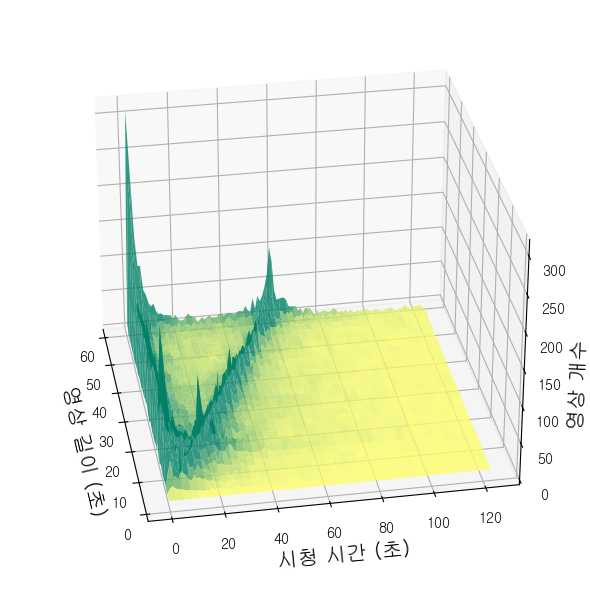

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

X, Y = np.meshgrid(np.unique(sec_list), np.unique(watched_duration_list))
Z = video_count_reshaped.T

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# 컬러맵 설정
surf = ax.plot_surface(X, Y, Z, cmap='summer_r',linewidth=1,vmax=20,vmin=0, alpha=0.8)

# 라벨설정
ax.set_xlabel('Seconds')
ax.set_ylabel('Watched Duration')
ax.set_zlabel('Video Count')

ax.invert_xaxis()

ax.set_xlabel('영상 길이 (초)',fontsize=15)
ax.set_ylabel('시청 시간 (초)',fontsize=15)
ax.set_zlabel('영상 개수',fontsize=15)
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.tick_params(axis='z')
new_elev = 30
ax.view_init(elev=new_elev, azim=-10)

plt.tight_layout()
plt.show()


# 2. 영상 비율 분석

5초 이하 시청 영상 비율

In [21]:
late_1=len(df_1[df_1['watched_duration']<=5])/len(df_1)*100
late_2=len(df_2[df_2['watched_duration']<=5])/len(df_2)*100
late_3=len(df_3[df_3['watched_duration']<=5])/len(df_3)*100
print("참가자 1:",late_1,"%")
print("참가자 2:",late_2,"%")
print("참가자 3:",late_3,"%")

참가자 1: 35.94940997120434 %
참가자 2: 25.86858182157347 %
참가자 3: 33.30662036418681 %


In [22]:
print("3명 평균:", (late_1+late_2+late_3)/3,"%")

3명 평균: 31.708204052321538 %


각 참가자마다 영상길이가 60초인 영상 비율

In [23]:
late_1=len(df_1[df_1['sec']==60])/len(df_1)*100
late_2=len(df_2[df_2['sec']==60])/len(df_2)*100
late_3=len(df_3[df_3['sec']==60])/len(df_3)*100
print("참가자 1:",late_1,"%")
print("참가자 2:",late_2,"%")
print("참가자 3:",late_3,"%")

참가자 1: 13.116142510304329 %
참가자 2: 11.47227533460803 %
참가자 3: 8.03615155157829 %


In [24]:
print("3명 평균:", (late_1+late_2+late_3)/3,"%")

3명 평균: 10.874856465496883 %


In [85]:
count=len(total_df[total_df['watched_duration']==total_df['sec']+1])+len(total_df[total_df['watched_duration']==total_df['sec']+2])+len(total_df[total_df['watched_duration']==total_df['sec']-1])+len(total_df[total_df['watched_duration']==total_df['sec']-2])
print("영상길이 +-2초 동안 시청한 영상 개수:",count)

영상길이 +-2초 동안 시청한 영상 개수: 6508


영상시간에 근접하게 시청한 비율

In [86]:
count/len(total_df)*100

10.562363060942952

2초 이하 시청 영상 비율

In [87]:
count=len(total_df[total_df['watched_duration']<=2])

In [88]:
count/len(total_df)*100

16.55278747058346

최대 영상 시간인 60초 영상 비율

In [90]:
print(len(total_df[total_df['sec']==60])/len(total_df)*100)

10.692201574291975


# Extra

### 시청 시간 중  어느 구간에 가장 많이 종료하는가

In [92]:
for i in range(0, 10):
    count = len(total_df[(total_df['watched_duration'] >= i) & (total_df['watched_duration'] < i+1)])
    count_2=len(total_df[total_df['watched_duration'] == i])
    print(f"시청시간 {i}초 이상 {i+1}초 미만 영상 수: {count} 개")
    print(count_2,"개")


시청시간 0초 이상 1초 미만 영상 수: 364 개
364 개
시청시간 1초 이상 2초 미만 영상 수: 4018 개
4018 개
시청시간 2초 이상 3초 미만 영상 수: 5817 개
5817 개
시청시간 3초 이상 4초 미만 영상 수: 4171 개
4171 개
시청시간 4초 이상 5초 미만 영상 수: 2931 개
2931 개
시청시간 5초 이상 6초 미만 영상 수: 2094 개
2094 개
시청시간 6초 이상 7초 미만 영상 수: 1702 개
1702 개
시청시간 7초 이상 8초 미만 영상 수: 1425 개
1425 개
시청시간 8초 이상 9초 미만 영상 수: 1206 개
1206 개
시청시간 9초 이상 10초 미만 영상 수: 1056 개
1056 개


### 초단위 넘겨버린 비율

In [71]:
for i in range(1, 11): 
    skip = len(total_df[total_df['watched_duration'] <= i])
    total = len(total_df)
    print(f"시청시간 {i}초 이하 비율: {skip/total*100:.2f}%")

시청시간 1초 이하 비율: 7.11%
시청시간 2초 이하 비율: 16.55%
시청시간 3초 이하 비율: 23.32%
시청시간 4초 이하 비율: 28.08%
시청시간 5초 이하 비율: 31.48%
시청시간 6초 이하 비율: 34.24%
시청시간 7초 이하 비율: 36.55%
시청시간 8초 이하 비율: 38.51%
시청시간 9초 이하 비율: 40.22%
시청시간 10초 이하 비율: 41.76%


In [94]:
a = [0,10, 20, 30, 40, 50, 60]
total_ratio=[]
for i in range(len(a) - 1):
    test = total_df[(total_df['sec'] > a[i]) & (total_df['sec'] <= a[i + 1])]
    skip = len(test[test['watched_duration'] <= 2])
    total = len(test)
    print(f"{a[i]}초< 영상시간<= {a[i+1]}초")
    print(f"시청시간 2초 이하 비율: {skip/total*100:.2f}%")
    total_ratio.append(skip/total*100)

0초< 영상시간<= 10초
시청시간 2초 이하 비율: 18.79%
10초< 영상시간<= 20초
시청시간 2초 이하 비율: 16.34%
20초< 영상시간<= 30초
시청시간 2초 이하 비율: 16.27%
30초< 영상시간<= 40초
시청시간 2초 이하 비율: 16.84%
40초< 영상시간<= 50초
시청시간 2초 이하 비율: 16.42%
50초< 영상시간<= 60초
시청시간 2초 이하 비율: 16.41%


In [73]:
total_ratio

[18.78831590335377,
 16.33836616338366,
 16.265584227312264,
 16.837136113296616,
 16.419420094403236,
 16.409306156063412]

In [74]:
sum(total_ratio)/6

16.843021442968823

### 카테고리별 5초 이하 시청 영상 비율

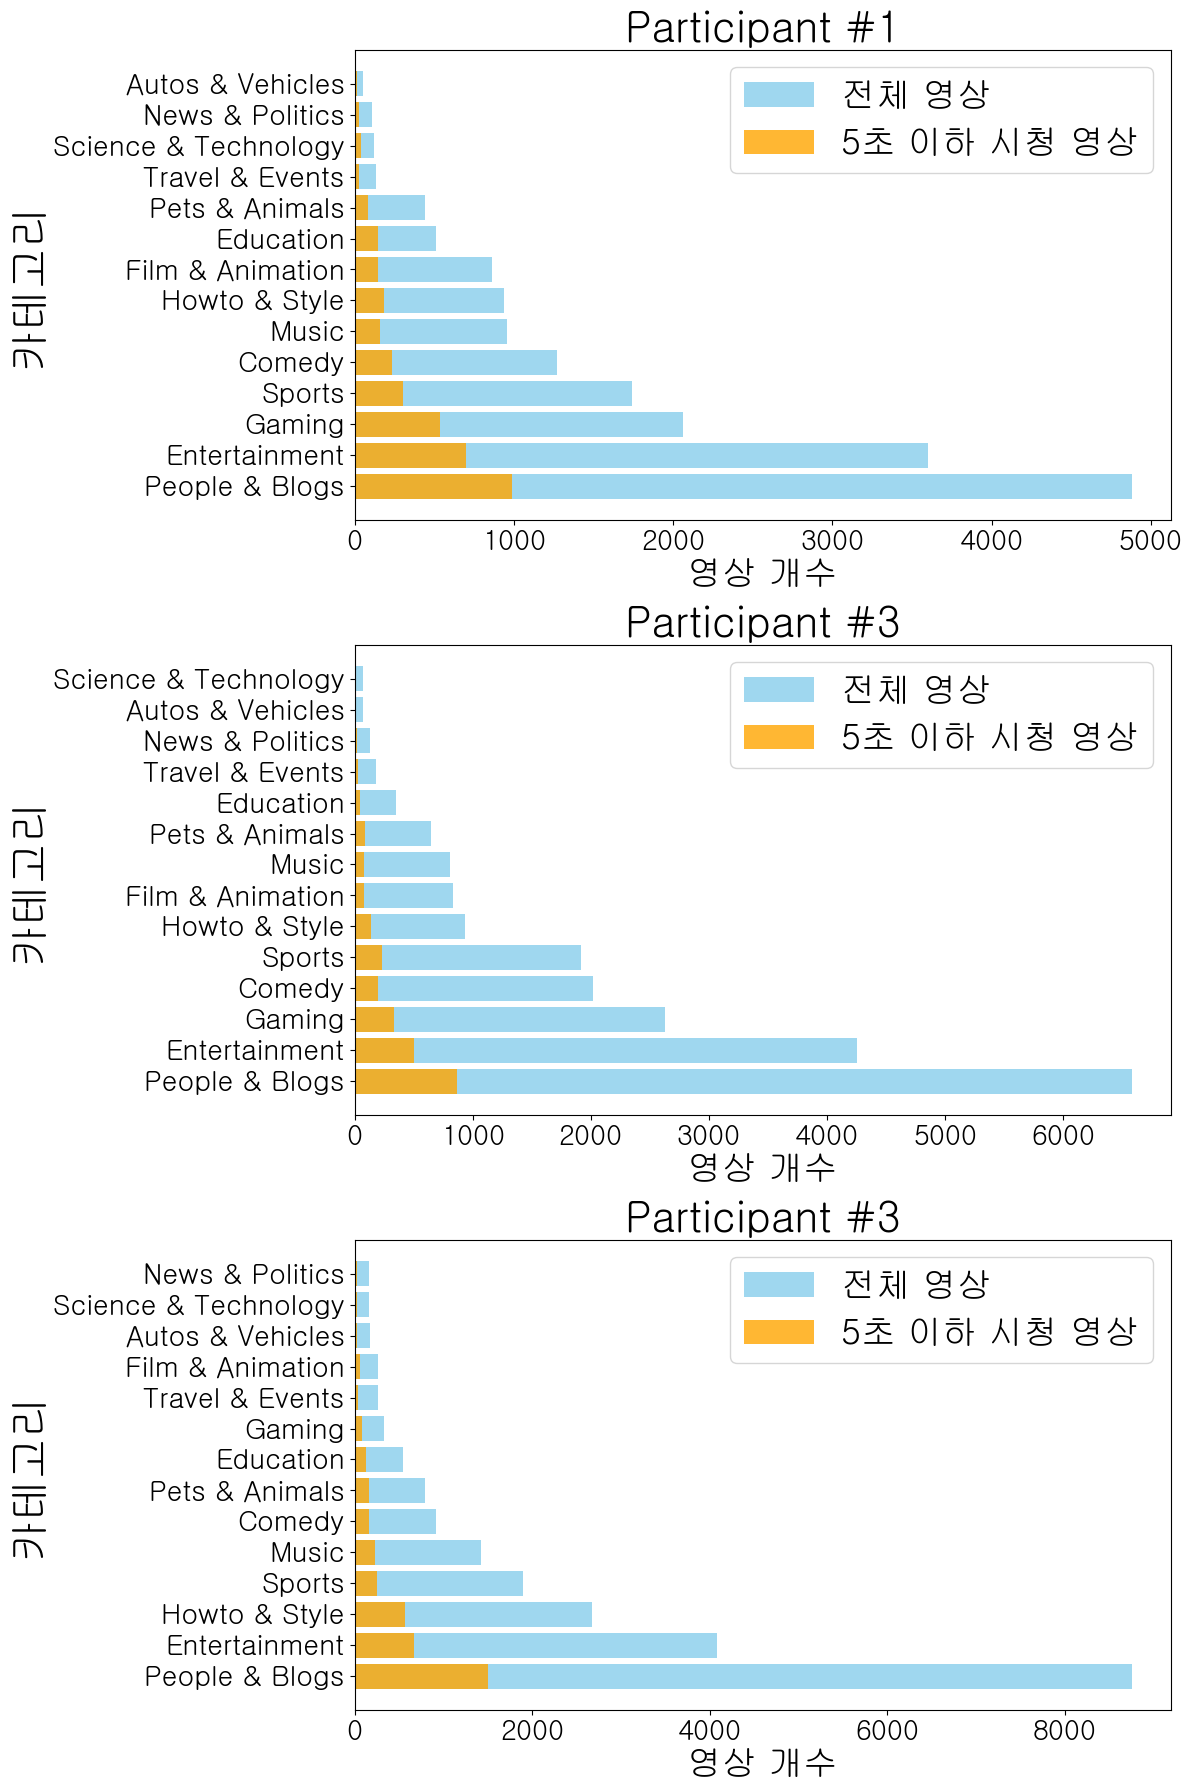

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Create three subplots in a single figure
fig, axes = plt.subplots(3, figsize=(12, 18))

# List of participant names and dataframes (replace these with your actual data)
participants = ["Participant #1", "Participant #3", "Participant #3"]
dataframes = [df_1, df_2, df_3]

for participant, df, ax in zip(participants, dataframes, axes):
    # Calculate total counts and filtered counts for each dataframe
    total_counts = df['category_id'].value_counts()
    filtered_counts = df[df['video_pref'] == 1]['category_id'].value_counts()
    
    # Create the bar graphs in the respective subplot with 'sky blue' and 'orange' colors
    ax.barh(total_counts.index, total_counts.values, alpha=0.8, label='전체 영상', color='skyblue')  # Use barh for horizontal bars
    ax.barh(filtered_counts.index, filtered_counts.values, alpha=0.8, label='5초 이하 시청 영상', color='orange')  # Use barh for horizontal bars
    ax.set_title(f'{participant}', fontsize=30)
    ax.set_xlabel('영상 개수', fontsize=25)  # Switched to x-axis label
    ax.set_ylabel('카테고리', fontsize=30)  # Switched to y-axis label
    
    # Rotate y-axis labels by 0 degrees for horizontal bars
    ax.tick_params(axis='y', rotation=0, labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

    # Set the legend with specific colors and labels
    ax.legend(prop=font)
    ax.legend(fontsize=25)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Increase or decrease the value as needed for spacing
plt.tight_layout()
plt.show()


In [76]:
for category_id in df_1['category_id'].unique():
    category_data = df_1[df_1['category_id'] == category_id]
    total_counts = len(category_data)
    if total_counts > 0:
        filtered_counts = len(category_data[category_data['video_pref'] == 1])
        percentage = (filtered_counts / total_counts) * 100
    else:
        percentage = 0  # Handle the case where total_counts is zero
    print(f'Category {category_id}: {percentage:.2f}%')


Category People & Blogs: 20.24%
Category Entertainment: 19.41%
Category Gaming: 25.87%
Category Comedy: 18.68%
Category Sports: 17.42%
Category Music: 16.91%
Category Pets & Animals: 18.82%
Category Film & Animation: 17.13%
Category Howto & Style: 19.64%
Category Science & Technology: 31.45%
Category News & Politics: 27.78%
Category Education: 29.16%
Category Travel & Events: 21.32%
Category Autos & Vehicles: 24.53%
Category nan: 0.00%


In [77]:
for category_id in df_2['category_id'].unique():
    category_data = df_2[df_2['category_id'] == category_id]
    total_counts = len(category_data)
    if total_counts > 0:
        filtered_counts = len(category_data[category_data['video_pref'] == 1])
        percentage = (filtered_counts / total_counts) * 100
    else:
        percentage = 0  # Handle the case where total_counts is zero
    print(f'Category {category_id}: {percentage:.2f}%')


Category Entertainment: 11.88%
Category Sports: 12.00%
Category People & Blogs: 13.23%
Category Comedy: 9.88%
Category Gaming: 12.82%
Category Film & Animation: 9.24%
Category Education: 12.36%
Category Music: 10.04%
Category Howto & Style: 14.70%
Category Pets & Animals: 13.98%
Category Autos & Vehicles: 18.92%
Category News & Politics: 15.62%
Category Travel & Events: 16.20%
Category Science & Technology: 15.07%
Category nan: 0.00%


In [78]:
for category_id in df_3['category_id'].unique():
    category_data = df_3[df_3['category_id'] == category_id]
    total_counts = len(category_data)
    if total_counts > 0:
        filtered_counts = len(category_data[category_data['video_pref'] == 1])
        percentage = (filtered_counts / total_counts) * 100
    else:
        percentage = 0  # Handle the case where total_counts is zero
    print(f'Category {category_id}: {percentage:.2f}%')


Category Howto & Style: 21.08%
Category Entertainment: 16.46%
Category People & Blogs: 17.20%
Category Music: 16.06%
Category Comedy: 17.74%
Category Autos & Vehicles: 14.86%
Category Pets & Animals: 20.68%
Category Sports: 13.59%
Category Film & Animation: 22.73%
Category Travel & Events: 15.30%
Category Education: 23.50%
Category Science & Technology: 15.76%
Category Gaming: 25.61%
Category News & Politics: 16.98%
Category nan: 0.00%


In [79]:
import numpy as np

for idx, df in enumerate([df_1, df_2, df_3]):
    total_percentage = []  # 모든 카테고리의 비율의 리스트 초기화

    for category_id in df['category_id'].unique():
        category_data = df[df['category_id'] == category_id]
        total_counts = len(category_data)

        if total_counts > 0:
            filtered_counts = len(category_data[category_data['video_pref'] == 1])
            percentage = (filtered_counts / total_counts) * 100

            # 0% 비율인 경우 무시
            if percentage > 0:
                total_percentage.append(percentage)

    if total_percentage:
        median_percentage = np.median(total_percentage)
        average_percentage = np.mean(total_percentage)
        variance_percentage = np.var(total_percentage)  # 분산 계산 추가
    else:
        median_percentage = 0  # 0% 비율일 때의 값 설정
        average_percentage = 0
        variance_percentage = 0
    print(total_percentage)
    print(f'DataFrame {idx + 1}:')
    print(f'평균 비율 (0% 제외): {average_percentage:.2f}%')
    print(f'중앙값 (0% 제외): {median_percentage:.2f}%')
    print(f'분산 (0% 제외): {variance_percentage:.2f}%')
    print()


[20.24175373898791, 19.411274645931687, 25.872093023255815, 18.681318681318682, 17.421203438395416, 16.910229645093946, 18.820861678004537, 17.12962962962963, 19.637139807897544, 31.451612903225808, 27.77777777777778, 29.158512720156555, 21.323529411764707, 24.528301886792452]
DataFrame 1:
평균 비율 (0% 제외): 22.03%
중앙값 (0% 제외): 19.94%
분산 (0% 제외): 21.63%

[11.883513386566463, 12.004175365344468, 13.233059860224856, 9.87593052109181, 12.818562190947128, 9.243697478991598, 12.35632183908046, 10.037174721189592, 14.696485623003195, 13.978494623655912, 18.91891891891892, 15.625, 16.201117318435752, 15.068493150684931]
DataFrame 2:
평균 비율 (0% 제외): 13.28%
중앙값 (0% 제외): 13.03%
분산 (0% 제외): 6.75%

[21.07824784724822, 16.458486407053638, 17.197670435080507, 16.056338028169016, 17.73667029379761, 14.857142857142858, 20.68095838587642, 13.58609794628752, 22.727272727272727, 15.298507462686567, 23.497267759562842, 15.757575757575756, 25.609756097560975, 16.9811320754717]
DataFrame 3:
평균 비율 (0% 제외): 18.39%

카테고리 id가 ~인 것과 5초 이하 시청이 관계가 없다.

In [80]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df_1 is your DataFrame
data_chi = df_1[['category_id', 'video_pref']]

# Create a contingency table
contingency_table = pd.crosstab(data_chi['category_id'], data_chi['video_pref'])

# Perform chi-square test for the entire dataset
chi2, p, _, _ = chi2_contingency(contingency_table)
print('Chi2 Statistic (Full Dataset): {}, p-value: {}'.format(chi2, p))


Chi2 Statistic (Full Dataset): 103.94177617517477, p-value: 2.8465267627766684e-16


In [81]:
chi2_check = []
for i in data_chi.columns.tolist():
    if chi2_contingency(pd.crosstab(data_chi['video_pref'], data_chi[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [data_chi.columns.tolist(), chi2_check]).T 
res.columns = ['Column', 'Hypothesis']
print(res)

        Column              Hypothesis
0  category_id  Reject Null Hypothesis
1   video_pref  Reject Null Hypothesis
